# FindDefault (Prediction of Credit Card fraud)

# INTRODUCTION

This project focuses on developing an efficient Machine Learning model in order to identify fraudulent transactions from various credit card transactions data.  

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

I will be following a step wise and organised process that would finally result in creating a golden model to serve the purpose.

## Importing the required libraries

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Reading the data into a dataframe

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explaining the variables in the dataframe

From the above dataframe, we can see that the data has 31 different columns.

The various features provided in the data are as follows:

1.**Time** - Time (in seconds) showing the time of the current transaction from the initial transaction.

2.**V1,V2,V3.....V28** - In order to preserve the custome privacy and security concerns, these are certain variables that has not been specifically definied and retrieved as a result of applying Principle Component Analysis(PCA) for dimensionality reduction.

3.**Amount** - Transaction amount

4.**Class** - Type of transaction (**1** for fraudulent, **0** for non fraudulent) (**Target Variable**)


# EXPLORATORY DATA ANALYSIS

## Gathering the information about the dataset

In [ ]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Since the time column has been given in seconds, we would be converting it into 2 separate columns in terms of minutes and hours for easier understanding of the data

In [ ]:
timedelta = pd.to_timedelta(df['Time'],unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour']=(timedelta.dt.components.hours).astype(int)


In [ ]:
df.drop(columns = ['Time'], inplace =True)

## Getting the dataset statistics summary

In [ ]:
df_summary = df.describe(include ='all')
df_summary

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,...,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727,28.997044,14.046470
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,17.427849,5.835854
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,14.000000,10.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,29.000000,15.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,44.000000,19.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,59.000000,23.000000


In [ ]:
# We will print out the neessary numerical details in the dataset

print('The shape of the dataframe is:',df.shape)
print('The different transaction categories in the data is:',df['Class'].unique())
print('The number of transaction that are non fraudulent(0) is', (df.Class==0).sum())
print('The number of transaction that are fraudulent(1) is', (df.Class==1).sum())
print('The total percentage of fraudulent transactions in the given data is',(df.Class==1).sum()/df.shape[0]*100)


The shape of the dataframe is: (284807, 32)
The different transaction categories in the data is: [0 1]
The number of transaction that are non fraudulent(0) is 284315
The number of transaction that are fraudulent(1) is 492
The total percentage of fraudulent transactions in the given data is 0.1727485630620034


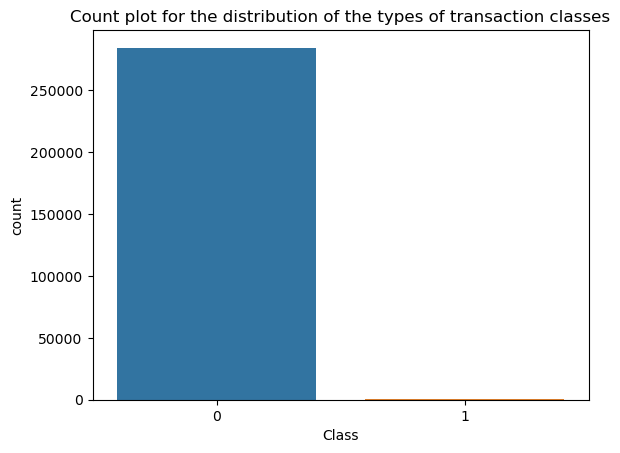

In [ ]:
# We will visualize the distribution of the transactions ussing countplot

sns.countplot(x=df['Class'])
plt.title('Count plot for the distribution of the types of transaction classes' )
plt.show()

From the countplot above, it is very evident that the data is highly imbalanced. This cold result in a high bias toward the class that has the majority values. The number of fraudulent transactions is oly about 0.17% of the entire data. Before we could proceed with using the data for developing a Machine Learning model, we would need to balance the data so that there would be no bias in the predictions.

Next, we will identiy the correlation of each variable with the target variable in order to see the amount of influence they have on the target variable

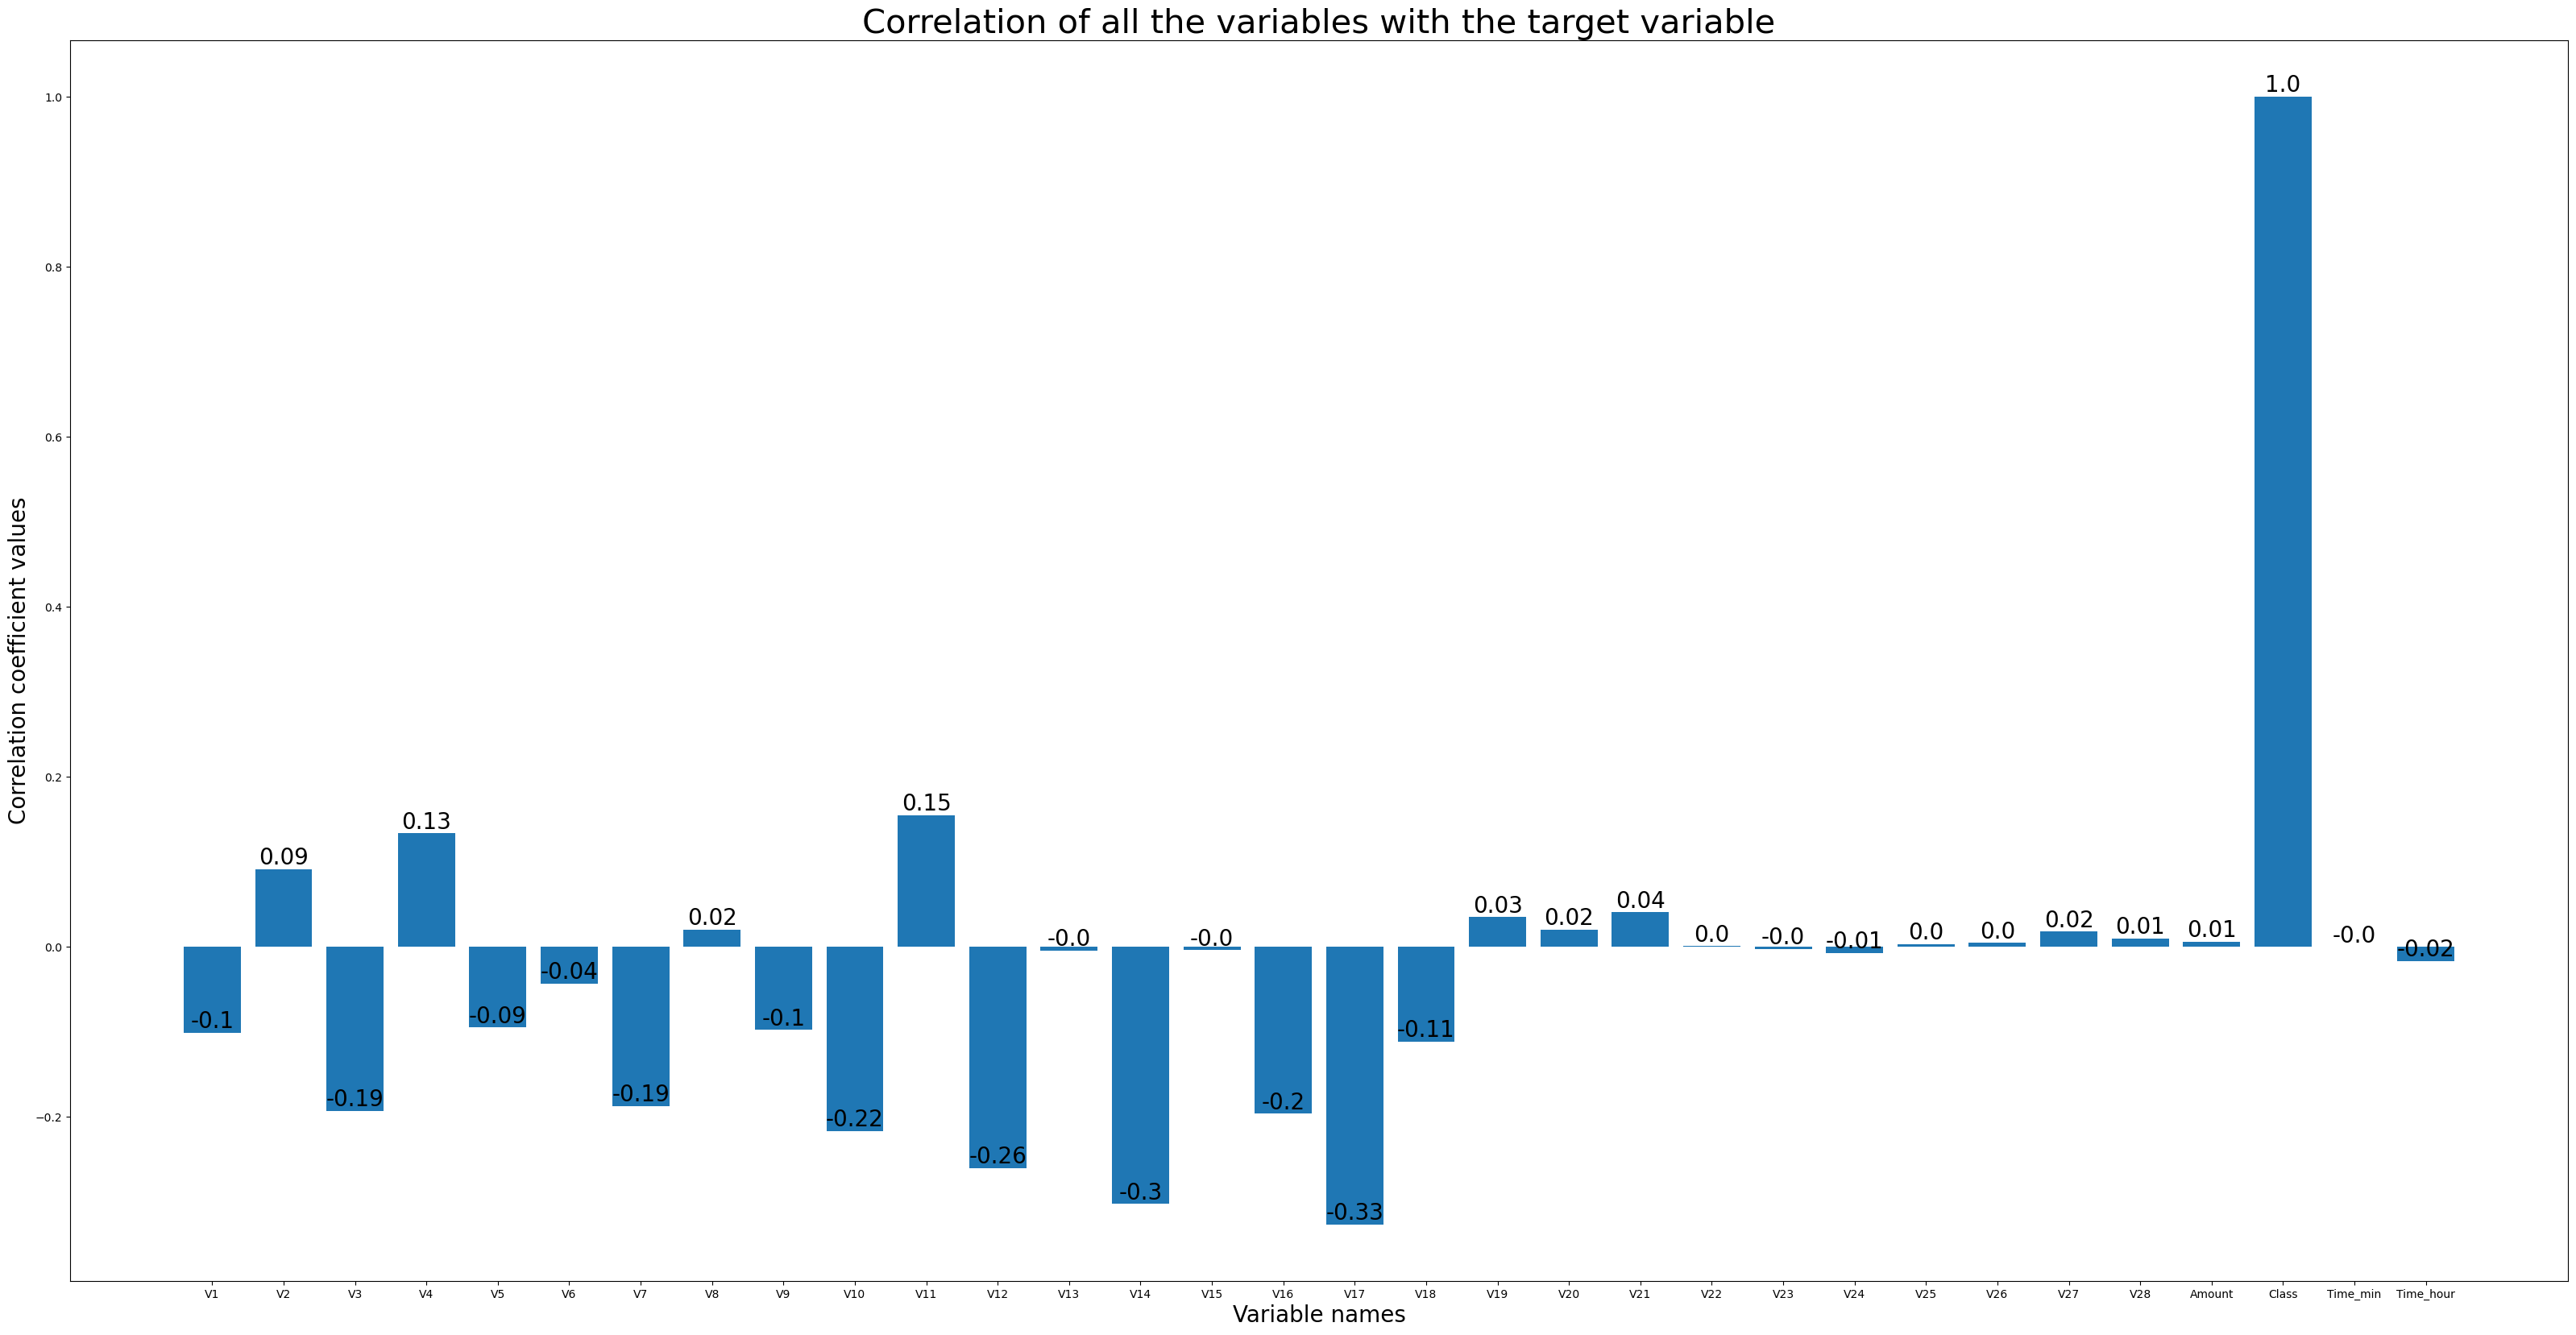

In [ ]:
# Visualisng the correlation of variables with the target variable

corr = df.corr()['Class']
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], np.round(y[i],2),fontsize=20,ha = 'center', va ='bottom' )
plt.figure(figsize = (40,20))
plt.bar(x=corr.index, data = df, height = corr)
plt.title('Correlation of all the variables with the target variable',fontsize = 30)
plt.xlabel('Variable names',fontsize = 20)
plt.ylabel('Correlation coefficient values',fontsize = 20)
add_labels(corr.index,corr)
plt.show()


From the above correlation coefficient values, we can see that a majority of the variables have little to no influence on the target variable.

We will further use a heatmap to get a clearer understanding in order to filter out the necessary features.

In [ ]:
corr_mat = df.corr()
corr_mat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
V1,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,-2.615192e-12,...,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347,-0.009700,-0.005214
V2,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,1.463282e-12,...,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289,0.001328,0.007802
V3,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,-1.609126e-12,...,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961,-0.009838,-0.021569
V4,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,-1.938143e-12,...,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447,-0.003307,-0.035063
V5,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,-7.200329e-13,...,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974,-0.002637,-0.035134
V6,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,7.429770e-13,...,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643,-0.003025,-0.018945
V7,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,1.674650e-12,...,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257,0.000192,-0.009729
V8,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,-1.660630e-12,...,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875,0.003874,0.032106
V9,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,1.185391e-12,...,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733,-0.028263,-0.189830
V10,-2.615192e-12,1.463282e-12,-1.609126e-12,-1.938143e-12,-7.200329e-13,7.429770e-13,1.674650e-12,-1.660630e-12,1.185391e-12,1.000000e+00,...,1.173332e-12,6.405710e-13,2.794979e-12,-2.738577e-13,1.552492e-12,5.116568e-12,-0.101502,-0.216883,0.003646,0.024177


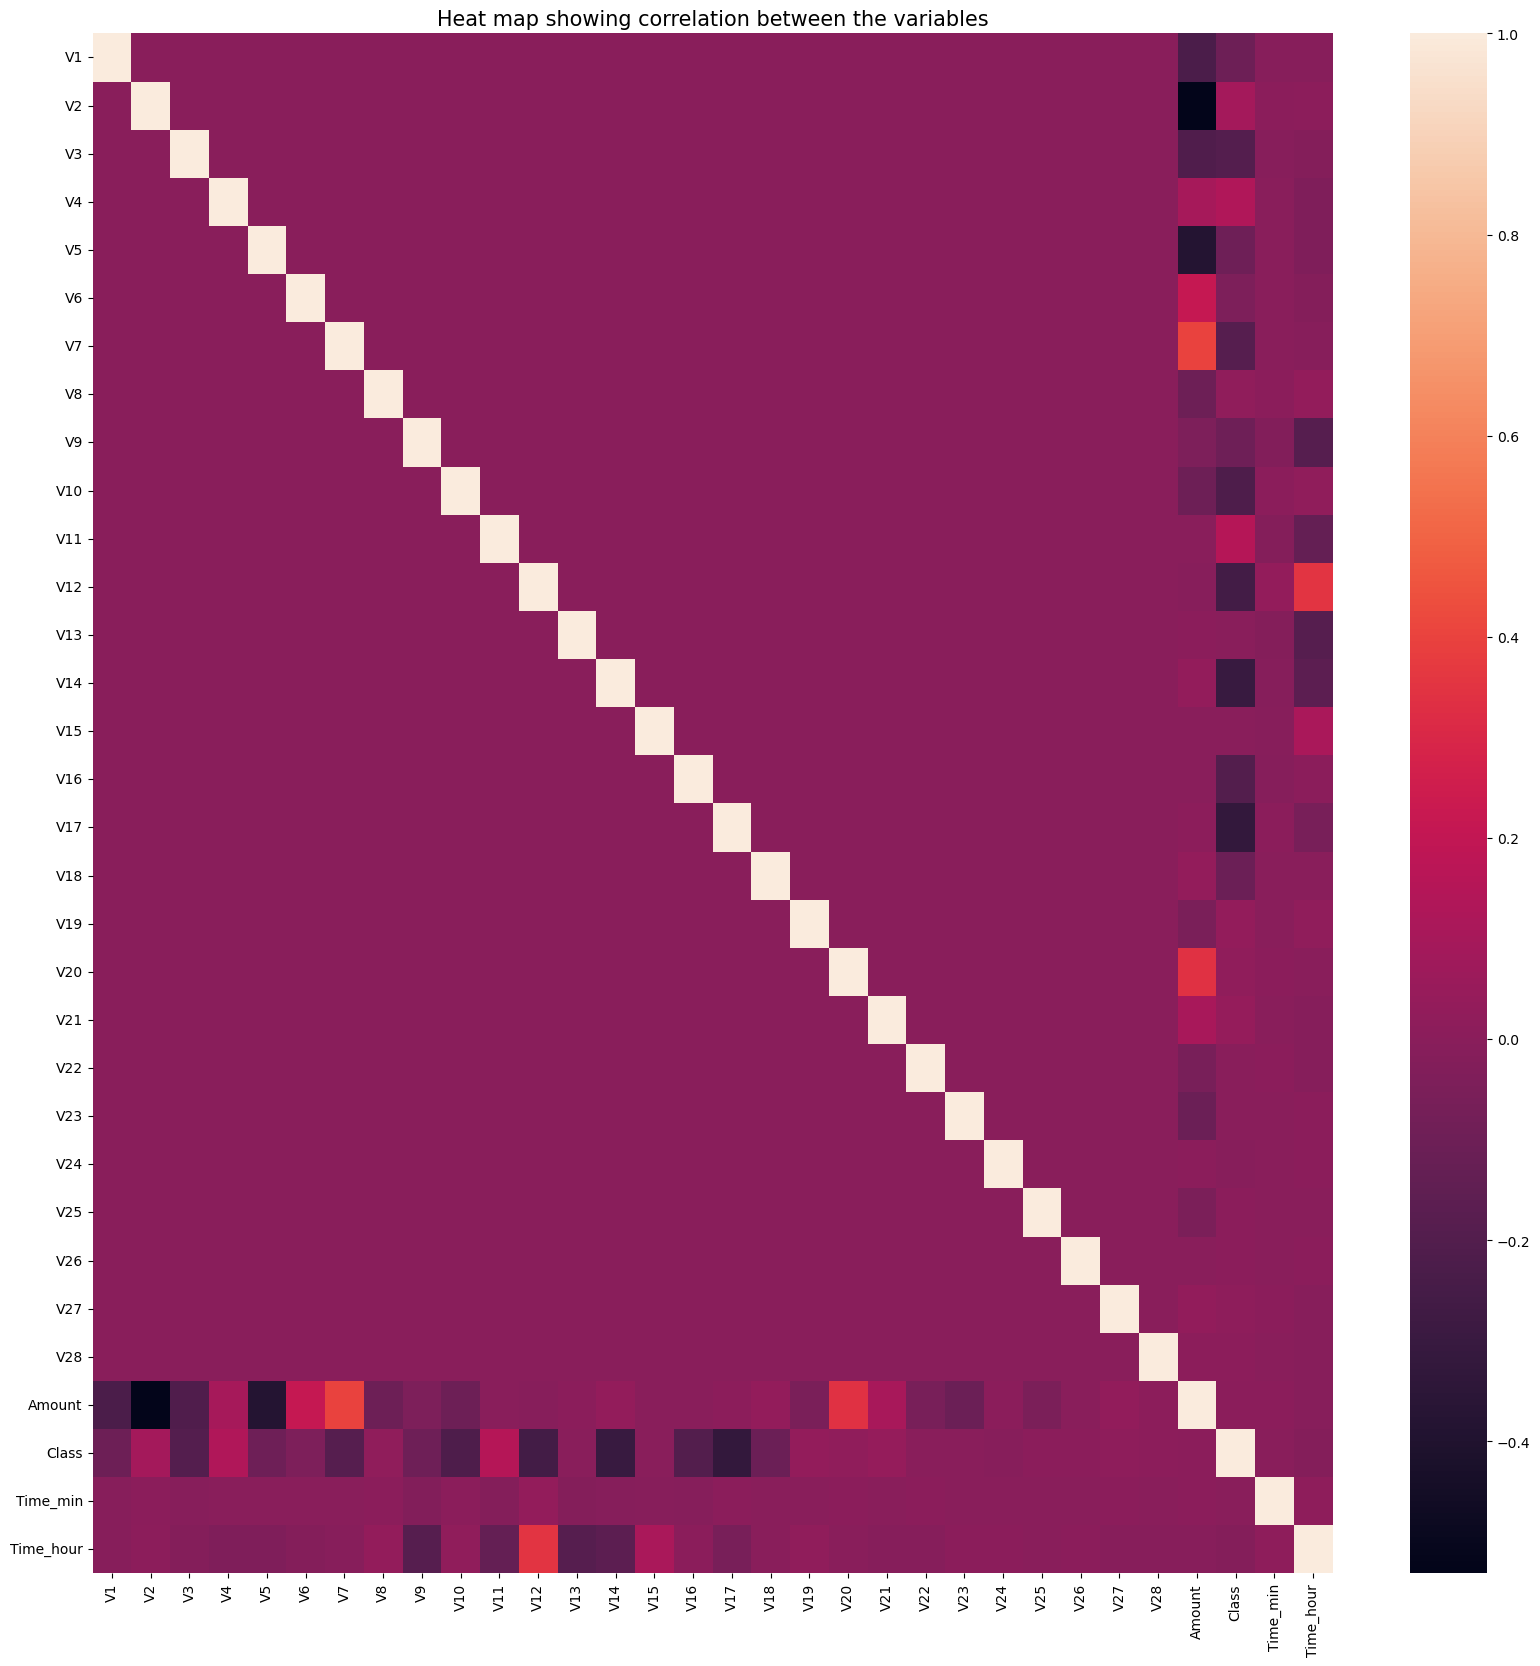

In [ ]:
# Heat map representation to check the correlation

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat)
plt.title('Heat map showing correlation between the variables', fontsize = 15)
plt.show()

Upon checking the intercorrelation of the feature, among themselves, we can see that the only Amount, Time_min and Time_hour has a slight inter- correlation, anyhow, it does not seem to have any sort of correlation with the target variable. Hence, we will be removing these features.

Based on the correlation values, we will be utlising only the features which have a correlation of more than **0.15**

In [ ]:
for i in df.columns:
    if abs(corr[i])<0.15:
        df.drop(columns = [i], inplace = True)


In [ ]:
df.head()

,V3,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


In [ ]:
print('The total number of columns are:',df.shape[1])
print('The number of feature variables are:',df.shape[1]-1)

The total number of columns are: 9
The number of feature variables are: 8


We have managed to reduce the features into a total of just 8 with 1 taget variable.

<function matplotlib.pyplot.show(close=None, block=None)>

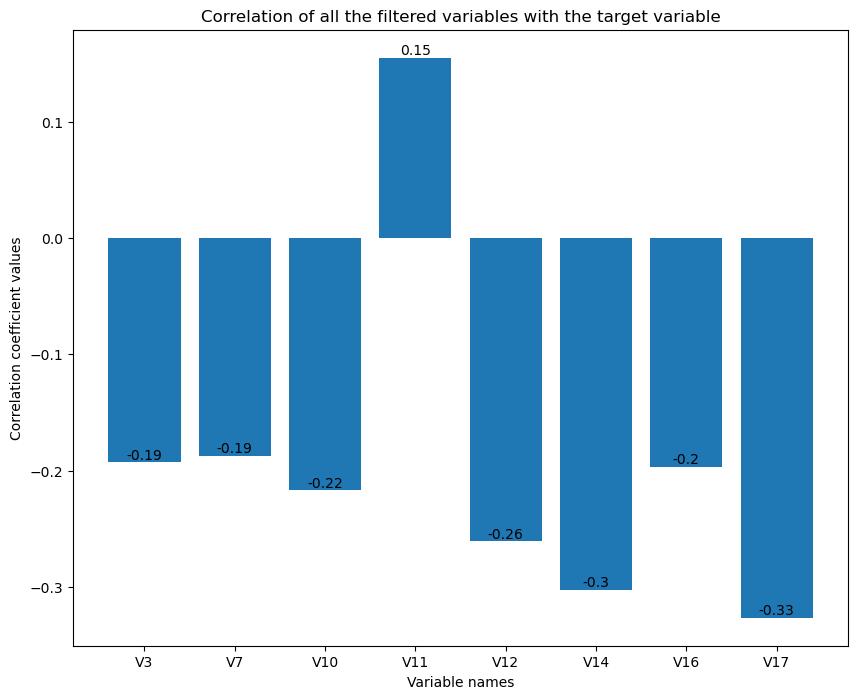

In [ ]:
# Visualising the filtered features and checking the correlation

corr_feat = df.corr()['Class'][:8]
def add_labels_new(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], np.round(y[i],2),ha = 'center', va ='bottom' )
plt.figure(figsize=(10,8))
plt.bar(x=corr_feat.index, data = df, height =corr_feat)
plt.title('Correlation of all the filtered variables with the target variable')
plt.xlabel('Variable names')
plt.ylabel('Correlation coefficient values')
add_labels_new(corr_feat.index,corr_feat)
plt.show

# DATA CLEANING

Identifying null values

In [ ]:
print('The total number of null values in the data is:',df.isnull().sum())

The total number of null values in the data is: V3       0
V7       0
V10      0
V11      0
V12      0
V14      0
V16      0
V17      0
Class    0
dtype: int64


 There are no missing values in the dataset.

Check for duplicates

In [ ]:
print('The total number of duplicated values in the data are:', df.duplicated().sum())

The total number of duplicated values in the data are: 9144


Since the data is imbalanced, removing the duplicated data without checking its distribution with the target variable might result in loosing valuable data

 We will check the distribution of the duplicated values among the fraudulent and non fraudulent transactions to see what needs to be done further

In [ ]:
print('There are',df[df['Class']==0].duplicated().sum(), 'duplicate values among', df[df['Class']==0].shape[0], ' non fraudulent transactions')
print('There are',df[df['Class']==1].duplicated().sum(), 'duplicate values among', df[df['Class']==0].shape[0], 'fraudulent transactions')

There are 9125 duplicate values among 284315  non fraudulent transactions
There are 19 duplicate values among 284315 fraudulent transactions


Considering that the duplicate values distributed among the 2 classes is very small, we can go ahead and drop the duplicate values

In [ ]:
print('The total number of rows before dropping the duplicate values are:',len(df))
df.drop_duplicates(inplace=True)
print('The total number of rows after dropping the duplicate values are:',len(df))


The total number of rows before dropping the duplicate values are: 284807
The total number of rows after dropping the duplicate values are: 275663


# DEALING WITH UNBALANCED DATASET

In order to develop a Machine Learning model which gives the best results without the risk of any bias, it is essential to ensure that our dataset is balanced.

 In our dataset, our data is highly imbalanced and biased toward the non-fraudulent transactions. Using the data as it is would result in an ML model which makes predictions which are highly biased.

 In order to prevent that, we need to balance our dataset before proceeding further.

 In order to balance our dataset, we can use two methods:
#### 1. Oversampling
#### 2. Undersampling

**Oversampling** is the method where the minority class in the target variable is artificially inflated by generating synthetic examples. One of the common methods employed in oversampling is **SMOTE(Synthetic Minority Over - sampling Technique)**

**Undersampling** is the method where all the data in the minority class is kept intact and the sample from the majority class is reduced in order to balance it with the minority class. One of the common and simplest method employed in undersampling is **Random undersampling**.

We will be using the undersampling technique here in our dataset to derive effective results


## Splitting the dataset into features and target variables

In [ ]:
X = df.drop('Class', axis =1)
y=df['Class']

### Undersampling using Random undersampling

In [ ]:
# Initialising and applying RandomUnderSampler

rus=RandomUnderSampler(random_state=42)
X_undersampled,y_undersampled = rus.fit_resample(X,y)


In [ ]:
# Display the shape of the data before and after oversampling

print('Shape of X,y before undersampling:', X.shape, y.shape)
print('Shape of X,y after undersampling:', X_undersampled.shape, y_undersampled.shape)


Shape of X,y before undersampling: (275663, 8) (275663,)
Shape of X,y after undersampling: (946, 8) (946,)


In [ ]:
# Display the class distribution before and after oversampling

print('The class distribution before undersampling:',y.value_counts())
print('The class distribution after undersampling:', y_undersampled.value_counts())

The class distribution before undersampling: Class
0    275190
1       473
Name: count, dtype: int64
The class distribution after undersampling: Class
0    473
1    473
Name: count, dtype: int64


In [ ]:
# Converting the undersampled data into a dataframe
df_us = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns),pd.DataFrame(y_undersampled, columns=['Class'])], axis =1)
df_us.head()

,V3,V7,V10,V11,V12,V14,V16,V17,Class
211350,-4.649212,0.765963,9.231557,1.219140,0.604376,-0.901066,-1.023622,-0.741934,0
75041,0.336087,0.013696,-0.084738,0.859991,0.583960,0.376478,-0.005623,-0.138804,0
7276,1.676177,0.973105,-1.318882,1.067027,-2.009790,1.551677,-0.022512,0.410314,0
106495,0.837337,-1.553094,0.904936,0.855569,0.958989,-0.582497,-1.051800,0.236958,0
168985,-1.681700,0.610695,0.060044,-0.796246,0.487835,0.390965,-0.628748,-0.024662,0


In [ ]:
# Disply the shape of the undersampled dataframe

print('The shape of the undersampled dataframe is:',df_us.shape)

The shape of the undersampled dataframe is: (946, 9)


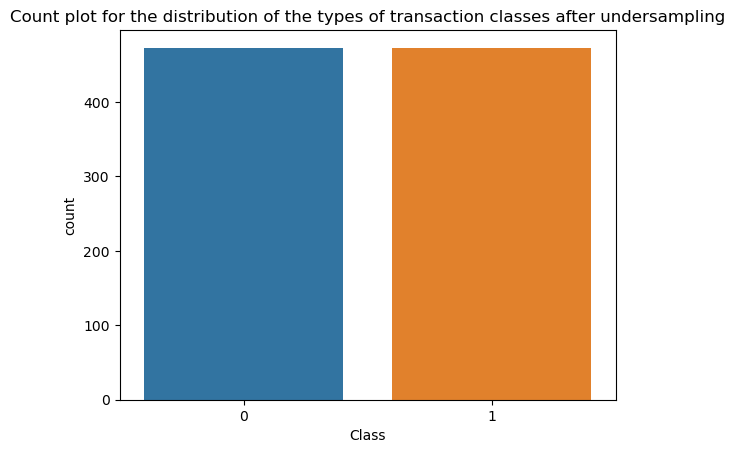

In [ ]:
#Visaualising the balanced dataset

sns.countplot(x=df_us['Class'])
plt.title('Count plot for the distribution of the types of transaction classes after undersampling' )
plt.show()

As a part of the Exploratory Data Analysis and since some of the variables has already been subjected to Principle Component Analysis, we have already taken care of feature engineering and feature transformation by effectively reducing the number of features into 8

# MODEL SELECTION

Since this is a credit fraud detection problem, it involves creating a classification model.

We will try out various models and evaluate which model has the best performance.

The models that we will be trying out are the following:
#### 1. Logistic Regression
#### 2. Decision Trees
#### 4. Random Forest Classifier

## Splitting the data into train and test data

###  Splitting of undersampled data:

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X_undersampled,y_undersampled,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((756, 8), (190, 8), (756,), (190,))

In [ ]:
# We will create a function to create the accuracy metrics for all the models:
def accuracy_metrics(model_name, y_test, y_pred):
    print('The accuracy metrics for the',model_name ,'are the following:')
    print('Accuracy score:',np.round(accuracy_score(y_test,y_pred),4)*100)
    print('ROC-AUC score:',np.round(roc_auc_score(y_test,y_pred),4)*100)
    print('Precision score:',np.round(precision_score(y_test,y_pred),4)*100)
    print('Recall score:',np.round(recall_score(y_test,y_pred),4)*100)
    print('F1 score:',np.round(f1_score(y_test,y_pred),4)*100)

### 1. LOGISTIC REGRESSION MODEL

In [ ]:
#Initialising the model

lr = LogisticRegression(random_state=42)

# Fitting the model

model = lr.fit(X_train,y_train)

# Prediting the target value on the test data

y_pred = model.predict(X_test)

In [ ]:
#Creating a confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[84,  4],
       [13, 89]], dtype=int64)

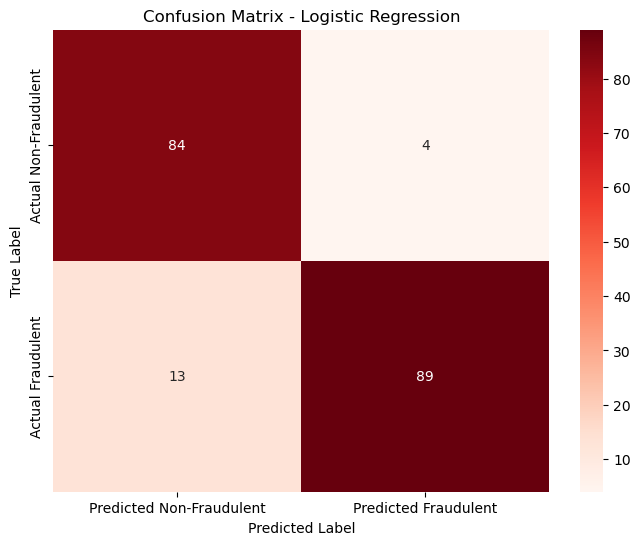

In [ ]:
# Visualising the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Reds',
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
           yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Accuracy metrics

acc_met_lr = accuracy_metrics('Logistic Regression',y_test,y_pred)
acc_met_lr

The accuracy metrics for the Logistic Regression are the following:
Accuracy score: 91.05
ROC-AUC score: 91.35
Precision score: 95.7
Recall score: 87.25
F1 score: 91.28


### 2. DECISION TREES

In [ ]:
# Initialising the model

dt = DecisionTreeClassifier(random_state=42)

# Fitting the model

model = dt.fit(X_train,y_train)

# Prediting the target value on the test data

y_pred = model.predict(X_test)

In [ ]:
#Creating a confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[79,  9],
       [12, 90]], dtype=int64)

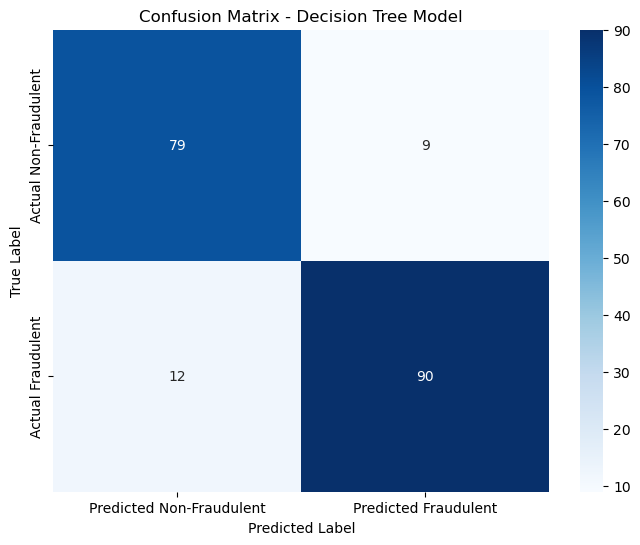

In [ ]:
# Visualising the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Blues',
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
           yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Accuracy metrics

acc_met_dt = accuracy_metrics('Decision Tree Model',y_test,y_pred)
acc_met_dt

The accuracy metrics for the Decision Tree Model are the following:
Accuracy score: 88.94999999999999
ROC-AUC score: 89.0
Precision score: 90.91
Recall score: 88.24
F1 score: 89.55


### 3. RANDOM FORESTS

In [ ]:
# Initialising the model:

rf = RandomForestClassifier(random_state=42)

# Fitting the model

model = rf.fit(X_train,y_train)

# Prediting the target value on the test data

y_pred = model.predict(X_test)

In [ ]:
#Creating a confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[85,  3],
       [13, 89]], dtype=int64)

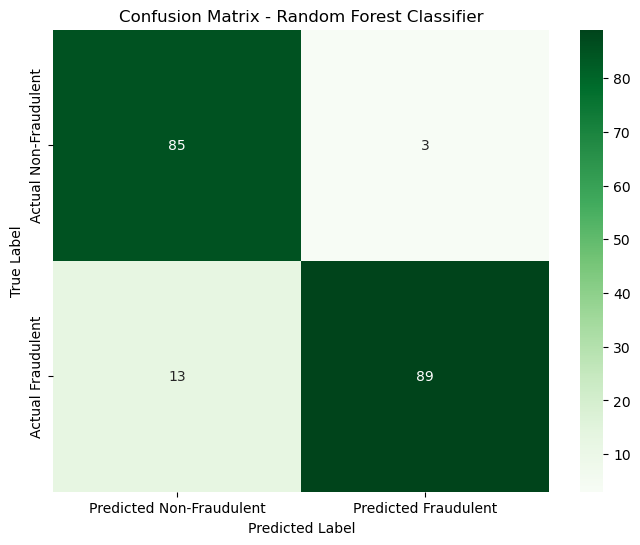

In [ ]:
# Visualising the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Greens',
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
           yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Accuracy metrics

acc_met_rf = accuracy_metrics('Random Forest Classifier',y_test,y_pred)
acc_met_rf

The accuracy metrics for the Random Forest Classifier are the following:
Accuracy score: 91.58
ROC-AUC score: 91.92
Precision score: 96.74000000000001
Recall score: 87.25
F1 score: 91.75


Based on the accurcy scores of the 3 models, The Random Forest Classifier has the highest accuracy (**91.58%**) followed by the Logistic Regression Model (**91.05%**) and lastly by the Decision Tree Model (**88.94%**).

# HYPERPARAMETER TUNING

### 1. HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION

There aren't many paramaters for this model that we can tune which would result in a big change of the metrics. hence, we will direclty proceed to the hyperparameter tuning of our next model.

### 2. HYPERPARAMETER TUNING FOR DECISION TREES

In [ ]:
#Initialising the model

dt = DecisionTreeClassifier(random_state=42)

# Setting the parameter ranges for tuning

parameters = {'criterion':['entropy','gini'],'max_depth':np.arange(5,20,5),'max_features':np.arange(1,8,1)}

# Initialiting the gridsearch to find the best paramters by hyperparameter tuning

gs = GridSearchCV(dt,parameters,cv = 5, scoring = 'accuracy', n_jobs = 10)

# Fitting the train dataset to find the best parameters

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=10,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 5, 10, 15]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7])},
             scoring='accuracy')

In [ ]:
#Best parameters

best_parameters_dt = gs.best_params_
best_parameters_dt

{'criterion': 'gini', 'max_depth': 5, 'max_features': 6}

In [ ]:
#Best Model

best_model_dt = gs.best_estimator_

#Fitting the best model

dt = best_model_dt.fit(X_train,y_train)

# Prediting the target value on the test data

y_pred=dt.predict(X_test)


In [ ]:
#Creating a confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[82,  6],
       [11, 91]], dtype=int64)

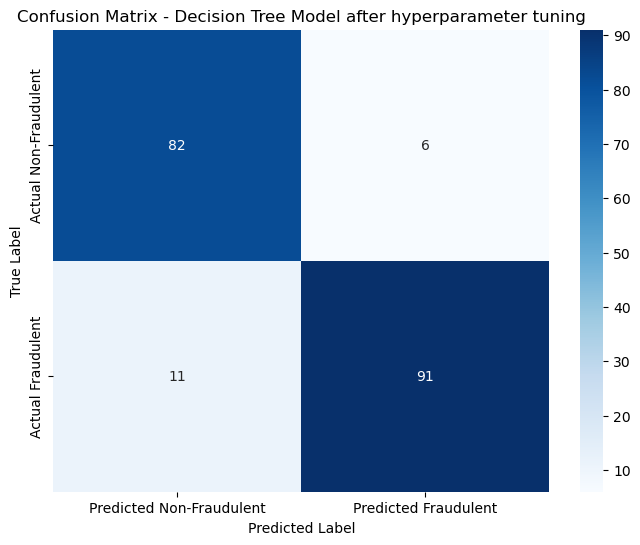

In [ ]:
# Visualising the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Blues',
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
           yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Decision Tree Model after hyperparameter tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Accuracy metrics

acc_met_best_dt = accuracy_metrics('Decision Tree Model after hyperparameter tuning',y_test,y_pred)
acc_met_best_dt

The accuracy metrics for the Decision Tree Model after hyperparameter tuning are the following:
Accuracy score: 91.05
ROC-AUC score: 91.2
Precision score: 93.81
Recall score: 89.22
F1 score: 91.46


### 2. HYPERPARAMETER TUNING FOR RANDOM FORESTS

In [ ]:
# Initialising the model:

rf = RandomForestClassifier(random_state=42)

# Setting the parameter ranges for tuning

parameters = {'criterion':['entropy','gini'],'n_estimators':np.arange(50,100,5),'max_depth':np.arange(5,20,5),'max_features':np.arange(1,8,1)}

# Initialiting the gridsearch to find the best paramters by hyperparameter tuning

gs = GridSearchCV(rf,parameters,cv = 5, scoring = 'accuracy', n_jobs = 10)

# Fitting the train dataset to find the best parameters

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=10,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 5, 10, 15]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])},
             scoring='accuracy')

In [ ]:
#Best parameters

best_parameters_rf = gs.best_params_
best_parameters_rf

{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 55}

In [ ]:
#Best Model

best_model_rf = gs.best_estimator_

#Fitting the best model

dt = best_model_rf.fit(X_train,y_train)

# Prediting the target value on the test data

y_pred=dt.predict(X_test)


In [ ]:
#Creating a confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[85,  3],
       [13, 89]], dtype=int64)

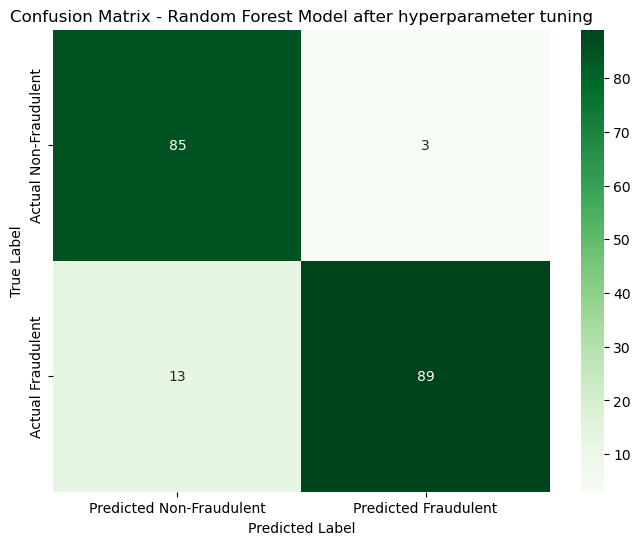

In [ ]:
# Visualising the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Greens',
            xticklabels=["Predicted Non-Fraudulent" , "Predicted Fraudulent"],
           yticklabels=["Actual Non-Fraudulent", "Actual Fraudulent"])
plt.title("Confusion Matrix - Random Forest Model after hyperparameter tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Accuracy metrics

acc_met_best_dt = accuracy_metrics('Random Forest Model after hyperparameter tuning',y_test,y_pred)
acc_met_best_dt

The accuracy metrics for the Random Forest Model after hyperparameter tuning are the following:
Accuracy score: 91.58
ROC-AUC score: 91.92
Precision score: 96.74000000000001
Recall score: 87.25
F1 score: 91.75


# FINDINGS FROM THE MODELS

After hyperparameter tuning, we coud see a minor improvement in the accuracy metrics of the Decision Tree Model ( ***91.05%***) and close to no improvement in the Random Forest Model ( ***91.58%***). Also, we can see that the accuracy metric for the logistic regression ( **91.05%**) was the same as that of the Decision Tree Model.

Since there are no major differences between the accuracy metrics of Random Forest Model in comparison with the other 2 models, we will drop this model since this is computationally heavy and time consuming to build.

Taking the other 2 models into consideration, since this is a fraud detection model, it is essential that that machine predicts the fraudulent charges better over the non fraudulent charges. In this case, based on the confusion matrix values, we can see that the fraudulent predicitions for the Decision Tree has a slight edge over that of the Logistic Regression model. Henceforth, we will be going forward with the **Decsion Tree Model** as our **golden model**.

### FEATURE IMPORTANCE

Lastly, we will plot the feature importance from our golden model in order to see which feature has the highest influence and which has the lowest. All the values have been rounded off to the 2 values.We finally plot the values in a bar graph in order to have a visual understanding of the same.

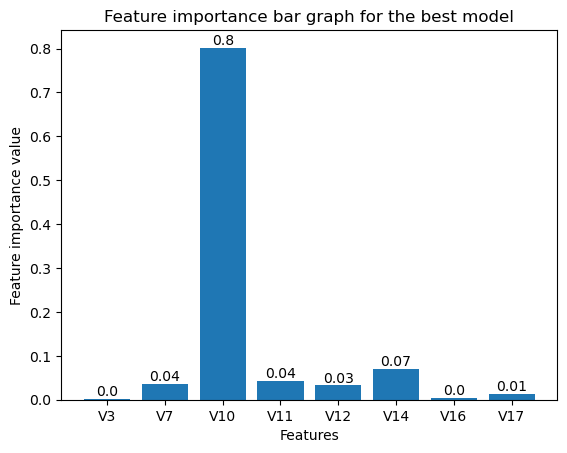

In [ ]:
feature_importance = best_model_dt.feature_importances_
plt.bar(x = X_train.columns, height=feature_importance)
plt.title('Feature importance bar graph for the best model')
plt.xlabel('Features')
plt.ylabel('Feature importance value')
add_labels_new(X_train.columns,feature_importance)
plt.show()

# CONCLUSION

**MODEL DEVELOPMENT** : Trhoughout this entire project, we followed a step wise well established methodology followed by other optimization and improvement methods in order to build the best model (**Decision tree model with a accuracy of 91.05%**)

**DATA HANDLING** : Considering that the data provided was highly imbalanced, we had identified the importance of balancing the data. Failing to do so would have resulted in prediction that would be highly biased. We used an undersampling method in order to handle the imbalance issue.

**OPTIMIZATION METHODS**: After building our models and getting a decent accuracy, we implementing hyperparameter tuning in order to try and tweak up the accuracy. We used Grid Search Cross Validation in order to identify the best parameters for the model.

**EVALUATION METRICS** : Even through the Random Forest Model had the highest accuracy metrics, we were able to observe that there were no major differences in compasrison with the other 2 models. Since the Random Forest Classifier is heavy on computation and expensive to perform, we went ahead with the decision tree model which had a better prediction of the fraudulent transactions in comparison with the logistic model.

**REAL-WORLD APPLICATION**: Since there are billions of transactions happening on a daily basis, it would be close to impossible to monitor each and every transaction manually. In order to overcome this issue, this specific model would greatly help financial sectors in identifying fraudulent transactions automatically so that necessary actions can be taken immediately.

**FUTURE SCOPE** : For future improvement of the process, we can try implementing various other models to improve its performance and also monitors the performance degradation overtime so that certain improvements can be made to the model to ensure high performance accuracy.